
# News Text Classification

* News Category Dataset set from [Kaggle competition](https://www.kaggle.com/rmisra/news-category-dataset).
* Nice [sklearn tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html).



## 1. Understanding the data



In [1]:
import pandas as pd
import numpy as np
import pylab as plt
 
#this assumes one json item per line in json file
df=pd.read_json("./data/news_category_dataset.json", lines=True)

In [2]:
print ( 'df.types:\n',df.dtypes)
print ( '\n df.shape: ',df.shape)

df.types:
 short_description            object
headline                     object
date                 datetime64[ns]
link                         object
authors                      object
category                     object
dtype: object

 df.shape:  (124989, 6)


In [3]:
df.sample(4)

,short_description,headline,date,link,authors,category
120927,"I love my looks, and quite frankly, I could ca...",Thriving Through Acceptance of Self,2014-06-05,https://www.huffingtonpost.com/entry/thriving-...,"Mari Lyles, ContributorCoach, author, and advo...",WOMEN
39142,Read this for your own emotional well-being.,"In A Crappy Year, These Sports Moments Brought...",2016-12-23,https://www.huffingtonpost.com/entry/feel-good...,Sebastian Murdock,SPORTS
24222,Jones has promoted a wild array of conspiracy ...,Megyn Kelly And The Danger Of Normalizing The ...,2017-06-12,https://www.huffingtonpost.com/entry/megyn-kel...,"Michael B. Keegan, ContributorPresident, Peopl...",MEDIA
113486,"The movie won Best Picture that year, and the ...","War, Remembrance, Five Star Accommodations and...",2014-08-28,https://www.huffingtonpost.com/entry/war-remem...,"Bob Richter, ContributorInterior Designer and ...",TRAVEL


In [4]:
df.columns

Index(['short_description', 'headline', 'date', 'link', 'authors', 'category'], dtype='object')

### 1.1 Date in the Data

In [5]:
print ('Date ranges from ', df.date.min().strftime('%Y-%m-%d'), 'to', df.date.max().strftime('%Y-%m-%d') )

Date ranges from  2014-04-18 to 2018-05-26


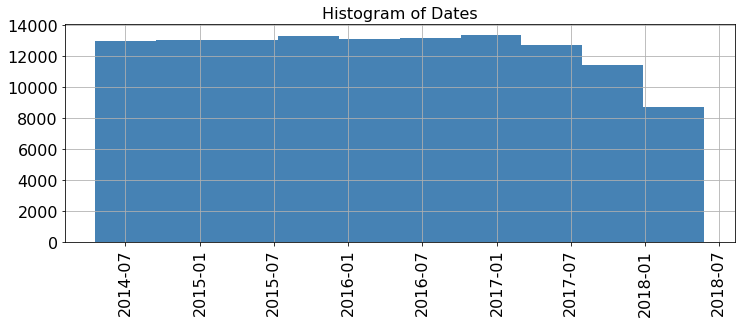

In [6]:
df.date.hist(color='steelblue', figsize=(12,4)) # lightskyblue
plt.title('Histogram of Dates',fontsize=16)
plt.xticks(fontsize=16, rotation=90);
plt.yticks(fontsize=16); #, color='maroon'


### 1.2 News Category

In [7]:
print ('Unique Catagories:\n', df.category.unique() )
print (f"\nThere are Total: {len(df.category.unique())} categories ")

Unique Catagories:
 ['CRIME' 'ENTERTAINMENT' 'WORLD NEWS' 'IMPACT' 'POLITICS' 'WEIRD NEWS'
 'BLACK VOICES' 'WOMEN' 'COMEDY' 'QUEER VOICES' 'SPORTS' 'BUSINESS'
 'TRAVEL' 'MEDIA' 'TECH' 'RELIGION' 'SCIENCE' 'LATINO VOICES' 'EDUCATION'
 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS']

There are Total: 31 categories 


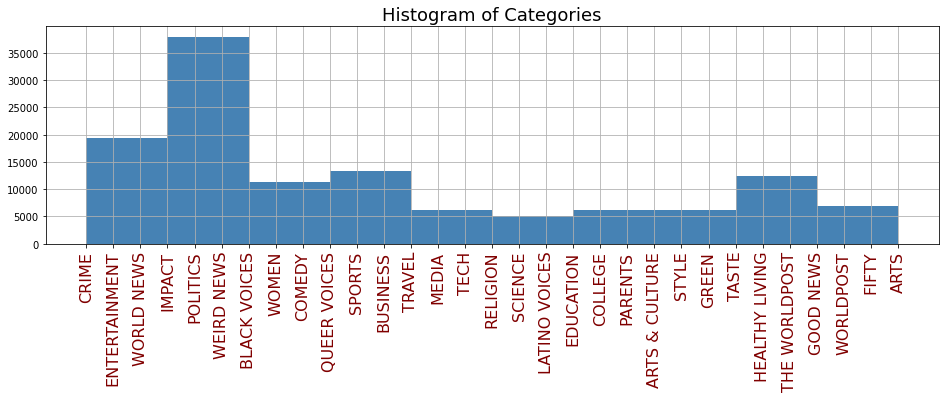

In [8]:
df.category.hist(color='steelblue', figsize=(16, 4)) # lightskyblue
plt.title('Histogram of Categories',fontsize=18)
plt.xticks(fontsize=16, rotation=90, color='maroon');

<font size="4" color='red'> NOTE: Be careful </font> in plotting the histogram as it gets the axes the wrong way round i.e. it tries to partition the y-axis (counts) into bins, and then plots the number of string labels in each bin.

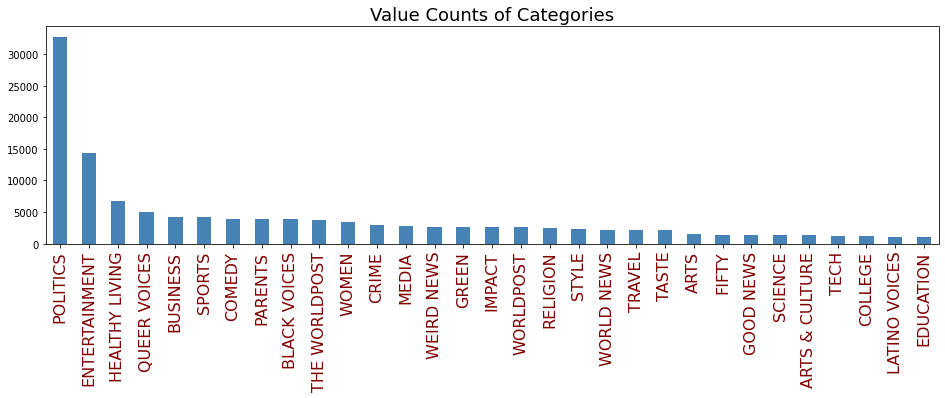

In [9]:
df.category.value_counts().plot(kind='bar', color='steelblue', figsize=(16, 4))
plt.title('Value Counts of Categories',fontsize=18)
plt.xticks(fontsize=16, rotation=90, color='maroon');

Politics has the highest number of articles and education has the least number (as expected) who cares about education!.

### 1.3  Words Count

In [10]:
from collections import Counter
all_cats = df.category.values
cc= Counter(all_cats)
print ( cc.items() )

print ( df.category.value_counts() )

dict_items([('CRIME', 2893), ('ENTERTAINMENT', 14257), ('WORLD NEWS', 2177), ('IMPACT', 2602), ('POLITICS', 32739), ('WEIRD NEWS', 2670), ('BLACK VOICES', 3858), ('WOMEN', 3490), ('COMEDY', 3971), ('QUEER VOICES', 4995), ('SPORTS', 4167), ('BUSINESS', 4254), ('TRAVEL', 2145), ('MEDIA', 2815), ('TECH', 1231), ('RELIGION', 2556), ('SCIENCE', 1381), ('LATINO VOICES', 1129), ('EDUCATION', 1004), ('COLLEGE', 1144), ('PARENTS', 3955), ('ARTS & CULTURE', 1339), ('STYLE', 2254), ('GREEN', 2622), ('TASTE', 2096), ('HEALTHY LIVING', 6694), ('THE WORLDPOST', 3664), ('GOOD NEWS', 1398), ('WORLDPOST', 2579), ('FIFTY', 1401), ('ARTS', 1509)])
POLITICS          32739
ENTERTAINMENT     14257
HEALTHY LIVING     6694
QUEER VOICES       4995
BUSINESS           4254
SPORTS             4167
COMEDY             3971
PARENTS            3955
BLACK VOICES       3858
THE WORLDPOST      3664
WOMEN              3490
CRIME              2893
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
IMP

## 2. Wordcloud

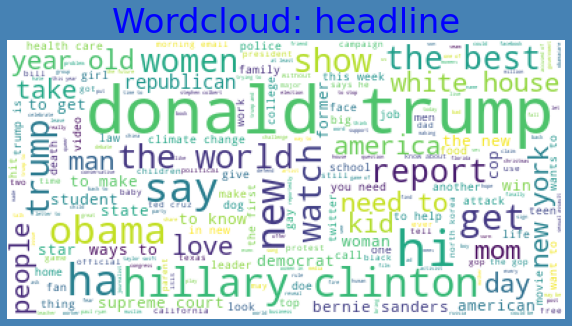

In [29]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

def PlotWordCloud(df, col):
    wordcloud = WordCloud(background_color='white',
                          max_words=2000,
                          stopwords=stopwords).generate(" ".join([dd.lower() for dd in df[col]]))

    plt.figure(figsize=(10,8), facecolor='steelblue', edgecolor='blue')
    plt.imshow(wordcloud, cmap='plasma')
    plt.axis("off")
    plt.title("Wordcloud: "+col, color='blue', fontsize=34)

PlotWordCloud(df, 'headline')

#print (STOPWORDS)


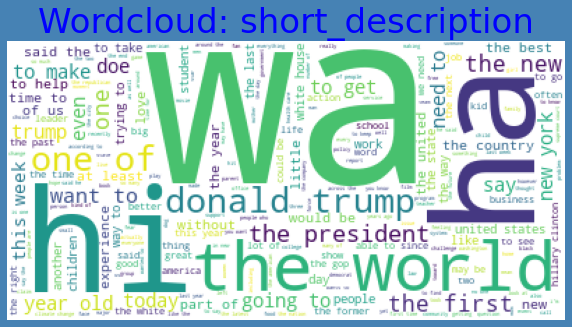

In [30]:
PlotWordCloud(df, 'short_description')